## **This notebook focus on CTGAN**

## **The data**
Insurance data isn't easy to find given the nature of the data. However there are [fictious data](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) around which class of amount of the insurance given data below.

* ` age `
* ` bmi `
* ` children `
* ` sex `
* ` smoker `
* ` region `

The target value is 0, 1, 2, 3 such that higher number represents a higher range of insurance. 

The amount of data for each target value is approximately the same.

Throughout the dataset, we are using **GTGAN**

# **Libraries**

In [2]:
from pycaret.classification import * 
#from pycaret.regression import * # Preprocessing, modelling, interpretation, deployment...
from sklearn.impute import SimpleImputer
import pandas as pd # Basic data manipulation
#import dabl as db # Summary plot
from sklearn.model_selection import train_test_split # Data split
from sdv.tabular import CopulaGAN, GaussianCopula, CTGAN # Synthetic data
from sdv.evaluation import evaluate # Evaluate synthetic data
#from btb.tuning import Tunable, GCPTuner # CopulaGAN optimising
#from btb.tuning import hyperparams as hp  # Set hyperparameters for optimising
import joblib # Saving preparation steps
import sdv.constraints as cons # Evaluate synthetic data
import pandas as pd

We first build a toy data set. With a data of 20% 0-100, 40% 100-200, 30% 200-300,10% 300-400, 

In [4]:
import random
# give a data of 20% 0-100, 40% 100-200, 30% 200-300,10% 300-400, 
small=[[100*random.random()] for _ in range (400)]
medium=[[100+100*random.random()] for _ in range (800)]
large=[[200+100*random.random()] for _ in range (600)]
extralarge=[[300+100*random.random()] for _ in range (200)]
mix=small+medium+large+extralarge
random.shuffle(mix)
df = pd.DataFrame(mix, columns=["s"])

Text(0, 0.5, 'occurrance')

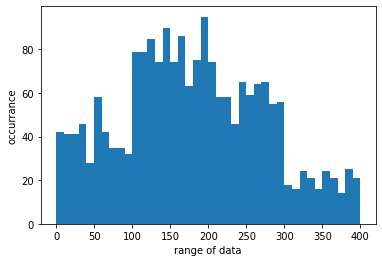

In [8]:
from matplotlib import pyplot as plt
#The historgram of the toy data
plt.hist(np.array(mix),bins=np.array([10*i for i in range(41)]))
plt.xlabel("range of data")
plt.ylabel("occurrance")

First, Gaussian copula

In [16]:
final_ans=[]
for _ in range (200):
    toy_ans = list()
    model = GaussianCopula()
    model.fit(df)
    synth = model.sample(num_rows = 2000)
    for i in range(4):
        num=len(synth["s"][synth["s"]<(i+1)*100][synth["s"]>=i*100])
        # Try to see the ration of each region
        toy_ans.append(num/2000)
    final_ans.append(toy_ans)
final_ans

[[0.203, 0.3905, 0.3035, 0.103],
 [0.2, 0.3845, 0.304, 0.1115],
 [0.197, 0.387, 0.3145, 0.1015],
 [0.2125, 0.369, 0.315, 0.1035],
 [0.2085, 0.381, 0.3115, 0.099],
 [0.1975, 0.377, 0.322, 0.1035],
 [0.227, 0.391, 0.2835, 0.0985],
 [0.206, 0.3835, 0.31, 0.1005],
 [0.185, 0.386, 0.331, 0.098],
 [0.191, 0.383, 0.3255, 0.1005],
 [0.21, 0.386, 0.317, 0.087],
 [0.1995, 0.3935, 0.304, 0.103],
 [0.198, 0.388, 0.3085, 0.1055],
 [0.1945, 0.3785, 0.3275, 0.0995],
 [0.2, 0.389, 0.3105, 0.1005],
 [0.1875, 0.3915, 0.3215, 0.0995],
 [0.203, 0.3845, 0.3195, 0.093],
 [0.211, 0.375, 0.309, 0.105],
 [0.194, 0.387, 0.3175, 0.1015],
 [0.1925, 0.383, 0.3145, 0.11],
 [0.212, 0.3775, 0.31, 0.1005],
 [0.19, 0.3935, 0.3085, 0.108],
 [0.207, 0.386, 0.305, 0.102],
 [0.215, 0.369, 0.31, 0.106],
 [0.192, 0.3915, 0.3115, 0.105],
 [0.218, 0.362, 0.3155, 0.1045],
 [0.211, 0.3865, 0.304, 0.0985],
 [0.2065, 0.374, 0.3145, 0.105],
 [0.1965, 0.386, 0.3195, 0.098],
 [0.197, 0.389, 0.315, 0.099],
 [0.21, 0.388, 0.3055, 0.096

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         3.,  4.,  1.,  8.,  7., 13., 25., 24., 20., 23., 26., 14., 13.,
        14.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 , 0.072, 0.074, 0.076,
        0.078, 0.08 , 0.082, 0.084, 0.086, 0.088, 0.09 , 0.092, 0.094,
        0.096, 0.098, 0.1  , 0.102, 0.104, 0.106, 0.108, 0.11 , 0.112,
        0.114, 0.116, 0.118, 0.12 , 0.122, 0.124, 0.126, 0.128, 0.13 ,
        0.132, 0.134, 0.136, 0.138]),
 <BarContainer object of 39 artists>)

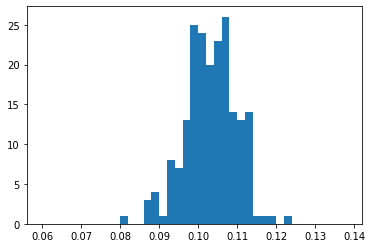

In [17]:
arr=np.array(final_ans)
trans_arr=np.transpose(arr)
plt.hist(trans_arr[3],bins=np.array([i/500 for i in range (30,70)]))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  4.,  4.,  4.,  4., 11., 13., 10., 20., 10., 12., 20.,
        12., 17., 13., 10.,  8.,  6.,  5.,  5.,  4.,  2.,  2.,  1.,  1.]),
 array([0.26 , 0.262, 0.264, 0.266, 0.268, 0.27 , 0.272, 0.274, 0.276,
        0.278, 0.28 , 0.282, 0.284, 0.286, 0.288, 0.29 , 0.292, 0.294,
        0.296, 0.298, 0.3  , 0.302, 0.304, 0.306, 0.308, 0.31 , 0.312,
        0.314, 0.316, 0.318, 0.32 , 0.322, 0.324, 0.326, 0.328, 0.33 ,
        0.332, 0.334, 0.336, 0.338]),
 <BarContainer object of 39 artists>)

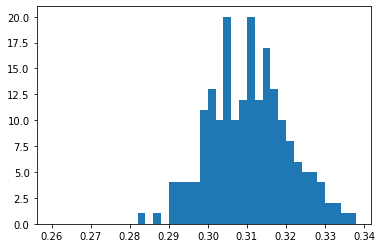

In [18]:
plt.hist(trans_arr[2],bins=np.array([i/500 for i in range (130,170)]))

(array([ 1.,  2.,  1.,  5.,  9.,  6.,  9., 11.,  9., 10.,  4., 16., 18.,
        22., 15., 18., 12., 14.,  6.,  2.,  1.,  3.,  2.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.36 , 0.362, 0.364, 0.366, 0.368, 0.37 , 0.372, 0.374, 0.376,
        0.378, 0.38 , 0.382, 0.384, 0.386, 0.388, 0.39 , 0.392, 0.394,
        0.396, 0.398, 0.4  , 0.402, 0.404, 0.406, 0.408, 0.41 , 0.412,
        0.414, 0.416, 0.418, 0.42 , 0.422, 0.424, 0.426, 0.428, 0.43 ,
        0.432, 0.434, 0.436, 0.438]),
 <BarContainer object of 39 artists>)

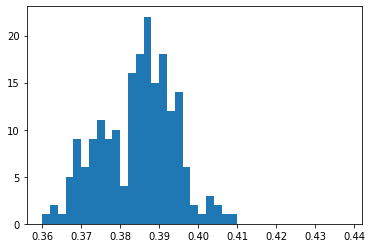

In [19]:
plt.hist(trans_arr[1],bins=np.array([i/500 for i in range (180,220)]))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  2.,
         2.,  4.,  4., 14.,  9., 17., 20., 17., 17., 15., 21., 10., 15.,
        14.,  5.,  4.,  2.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([0.16 , 0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176,
        0.178, 0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194,
        0.196, 0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212,
        0.214, 0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 ,
        0.232, 0.234, 0.236, 0.238]),
 <BarContainer object of 39 artists>)

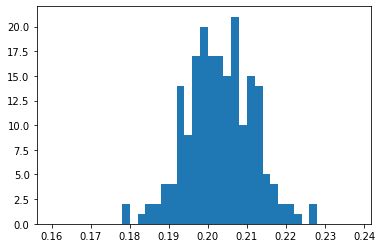

In [20]:
plt.hist(trans_arr[0],bins=np.array([i/500 for i in range (80,120)]))

Then, CopulaGAN

In [21]:
final_ans=[]
for _ in range (20):
    toy_ans = list()
    model = CopulaGAN()
    model.fit(df)
    synth = model.sample(num_rows = 2000)
    for i in range(4):
        num=len(synth["s"][synth["s"]<(i+1)*100][synth["s"]>=i*100])
        # Try to see the ratio of each region
        toy_ans.append(num/2000)
    final_ans.append(toy_ans)
final_ans

[[0.121, 0.2825, 0.3985, 0.198],
 [0.1025, 0.2585, 0.4335, 0.2055],
 [0.234, 0.475, 0.2045, 0.0865],
 [0.231, 0.512, 0.1565, 0.1005],
 [0.0775, 0.2305, 0.503, 0.189],
 [0.1625, 0.47, 0.2645, 0.103],
 [0.084, 0.277, 0.4665, 0.1725],
 [0.3725, 0.356, 0.186, 0.0855],
 [0.12, 0.3555, 0.411, 0.1135],
 [0.1, 0.4605, 0.3065, 0.133],
 [0.2, 0.534, 0.182, 0.084],
 [0.1395, 0.507, 0.277, 0.0765],
 [0.1195, 0.2005, 0.5265, 0.1535],
 [0.1185, 0.4155, 0.374, 0.092],
 [0.101, 0.229, 0.4985, 0.1715],
 [0.0925, 0.2345, 0.491, 0.182],
 [0.337, 0.4125, 0.1835, 0.067],
 [0.3305, 0.493, 0.1225, 0.054],
 [0.1225, 0.3725, 0.35, 0.155],
 [0.126, 0.2455, 0.485, 0.1435]]

(array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 2., 1., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0.]),
 array([0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 , 0.072, 0.074, 0.076,
        0.078, 0.08 , 0.082, 0.084, 0.086, 0.088, 0.09 , 0.092, 0.094,
        0.096, 0.098, 0.1  , 0.102, 0.104, 0.106, 0.108, 0.11 , 0.112,
        0.114, 0.116, 0.118, 0.12 , 0.122, 0.124, 0.126, 0.128, 0.13 ,
        0.132, 0.134, 0.136, 0.138]),
 <BarContainer object of 39 artists>)

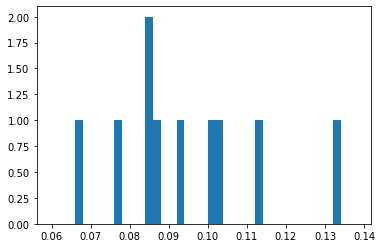

In [22]:
arr=np.array(final_ans)
trans_arr=np.transpose(arr)
plt.hist(trans_arr[3],bins=np.array([i/500 for i in range (30,70)]))

(array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([0.26 , 0.262, 0.264, 0.266, 0.268, 0.27 , 0.272, 0.274, 0.276,
        0.278, 0.28 , 0.282, 0.284, 0.286, 0.288, 0.29 , 0.292, 0.294,
        0.296, 0.298, 0.3  , 0.302, 0.304, 0.306, 0.308, 0.31 , 0.312,
        0.314, 0.316, 0.318, 0.32 , 0.322, 0.324, 0.326, 0.328, 0.33 ,
        0.332, 0.334, 0.336, 0.338]),
 <BarContainer object of 39 artists>)

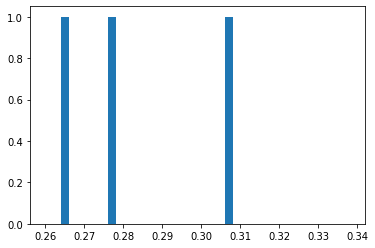

In [23]:
plt.hist(trans_arr[2],bins=np.array([i/500 for i in range (130,170)]))

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([0.36 , 0.362, 0.364, 0.366, 0.368, 0.37 , 0.372, 0.374, 0.376,
        0.378, 0.38 , 0.382, 0.384, 0.386, 0.388, 0.39 , 0.392, 0.394,
        0.396, 0.398, 0.4  , 0.402, 0.404, 0.406, 0.408, 0.41 , 0.412,
        0.414, 0.416, 0.418, 0.42 , 0.422, 0.424, 0.426, 0.428, 0.43 ,
        0.432, 0.434, 0.436, 0.438]),
 <BarContainer object of 39 artists>)

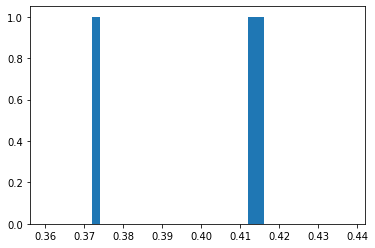

In [24]:
plt.hist(trans_arr[1],bins=np.array([i/500 for i in range (180,220)]))

(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0.]),
 array([0.16 , 0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176,
        0.178, 0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194,
        0.196, 0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212,
        0.214, 0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 ,
        0.232, 0.234, 0.236, 0.238]),
 <BarContainer object of 39 artists>)

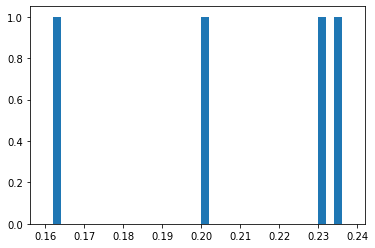

In [25]:
plt.hist(trans_arr[0],bins=np.array([i/500 for i in range (80,120)]))

Finally, CTGAN

In [31]:
final_ans=[]
for _ in range (20):
    toy_ans = list()
    model = CTGAN()
    model.fit(df)
    synth = model.sample(num_rows = 2000)
    for i in range(4):
        num=len(synth["s"][synth["s"]<(i+1)*100][synth["s"]>=i*100])
        # Try to see the ration of each region
        toy_ans.append(num/2000)
    final_ans.append(toy_ans)
final_ans

[[0.161, 0.4615, 0.301, 0.0765],
 [0.2865, 0.4775, 0.1625, 0.0735],
 [0.104, 0.2655, 0.4405, 0.19],
 [0.187, 0.545, 0.177, 0.091],
 [0.0835, 0.3465, 0.4775, 0.0925],
 [0.183, 0.5005, 0.2415, 0.075],
 [0.104, 0.2815, 0.501, 0.1135],
 [0.304, 0.371, 0.23, 0.095],
 [0.094, 0.237, 0.504, 0.165],
 [0.242, 0.3955, 0.2295, 0.133],
 [0.342, 0.395, 0.1885, 0.0745],
 [0.095, 0.2195, 0.5125, 0.173],
 [0.2175, 0.506, 0.177, 0.0995],
 [0.3895, 0.3725, 0.1765, 0.0615],
 [0.3045, 0.46, 0.154, 0.0815],
 [0.0985, 0.212, 0.464, 0.2255],
 [0.0905, 0.2085, 0.494, 0.207],
 [0.14, 0.496, 0.2305, 0.1335],
 [0.0965, 0.415, 0.3355, 0.153],
 [0.317, 0.476, 0.1295, 0.0775]]

(array([1., 0., 0., 0., 0., 0., 1., 2., 2., 0., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 0., 0.]),
 array([0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 , 0.072, 0.074, 0.076,
        0.078, 0.08 , 0.082, 0.084, 0.086, 0.088, 0.09 , 0.092, 0.094,
        0.096, 0.098, 0.1  , 0.102, 0.104, 0.106, 0.108, 0.11 , 0.112,
        0.114, 0.116, 0.118, 0.12 , 0.122, 0.124, 0.126, 0.128, 0.13 ,
        0.132, 0.134, 0.136, 0.138]),
 <BarContainer object of 39 artists>)

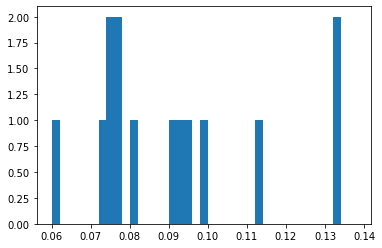

In [32]:
arr=np.array(final_ans)
trans_arr=np.transpose(arr)
plt.hist(trans_arr[3],bins=np.array([i/500 for i in range (30,70)]))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.]),
 array([0.26 , 0.262, 0.264, 0.266, 0.268, 0.27 , 0.272, 0.274, 0.276,
        0.278, 0.28 , 0.282, 0.284, 0.286, 0.288, 0.29 , 0.292, 0.294,
        0.296, 0.298, 0.3  , 0.302, 0.304, 0.306, 0.308, 0.31 , 0.312,
        0.314, 0.316, 0.318, 0.32 , 0.322, 0.324, 0.326, 0.328, 0.33 ,
        0.332, 0.334, 0.336, 0.338]),
 <BarContainer object of 39 artists>)

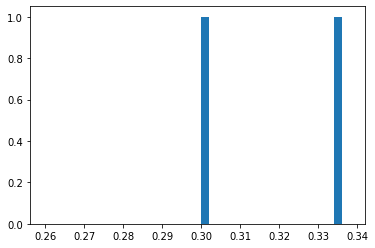

In [33]:
plt.hist(trans_arr[2],bins=np.array([i/500 for i in range (130,170)]))

(array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([0.36 , 0.362, 0.364, 0.366, 0.368, 0.37 , 0.372, 0.374, 0.376,
        0.378, 0.38 , 0.382, 0.384, 0.386, 0.388, 0.39 , 0.392, 0.394,
        0.396, 0.398, 0.4  , 0.402, 0.404, 0.406, 0.408, 0.41 , 0.412,
        0.414, 0.416, 0.418, 0.42 , 0.422, 0.424, 0.426, 0.428, 0.43 ,
        0.432, 0.434, 0.436, 0.438]),
 <BarContainer object of 39 artists>)

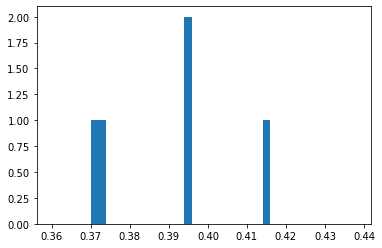

In [34]:
plt.hist(trans_arr[1],bins=np.array([i/500 for i in range (180,220)]))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]),
 array([0.16 , 0.162, 0.164, 0.166, 0.168, 0.17 , 0.172, 0.174, 0.176,
        0.178, 0.18 , 0.182, 0.184, 0.186, 0.188, 0.19 , 0.192, 0.194,
        0.196, 0.198, 0.2  , 0.202, 0.204, 0.206, 0.208, 0.21 , 0.212,
        0.214, 0.216, 0.218, 0.22 , 0.222, 0.224, 0.226, 0.228, 0.23 ,
        0.232, 0.234, 0.236, 0.238]),
 <BarContainer object of 39 artists>)

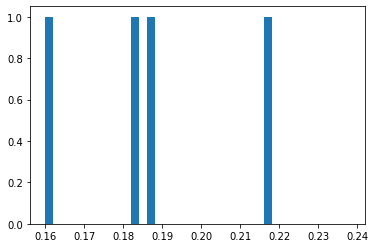

In [35]:
plt.hist(trans_arr[0],bins=np.array([i/500 for i in range (80,120)]))